In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AB_clean.csv', index_col='id')

In [3]:
df = df.convert_dtypes()

In [4]:
df.room_type = df.room_type.astype('category')
df.neighbourhood_group = df.neighbourhood_group.astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48890 entries, 2539 to 36487245
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48890 non-null  Int64   
 1   neighbourhood_group             48890 non-null  category
 2   neighbourhood                   48890 non-null  string  
 3   latitude                        48890 non-null  Float64 
 4   longitude                       48890 non-null  Float64 
 5   room_type                       48890 non-null  category
 6   price                           48890 non-null  Int64   
 7   minimum_nights                  48890 non-null  Int64   
 8   number_of_reviews               48890 non-null  Int64   
 9   reviews_per_month               48890 non-null  Float64 
 10  calculated_host_listings_count  48890 non-null  Int64   
 11  availability_365                48890 non-null  Int64   
dtypes: Float64(3

In [6]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889000e+04,48890.000000,48890.000000,48890.000000,48890.000000,48890.000000,48890.000000,48890.000000,48890.000000
mean,6.761919e+07,40.728947,-73.952167,152.718552,6.923359,23.276273,1.090997,7.144508,112.764574
std,7.861043e+07,0.054531,0.046157,240.163382,17.565954,44.552404,1.597335,32.954157,131.612475
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822737e+06,40.690092,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079553e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763117,-73.936270,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,500.000000,629.000000,58.500000,327.000000,365.000000


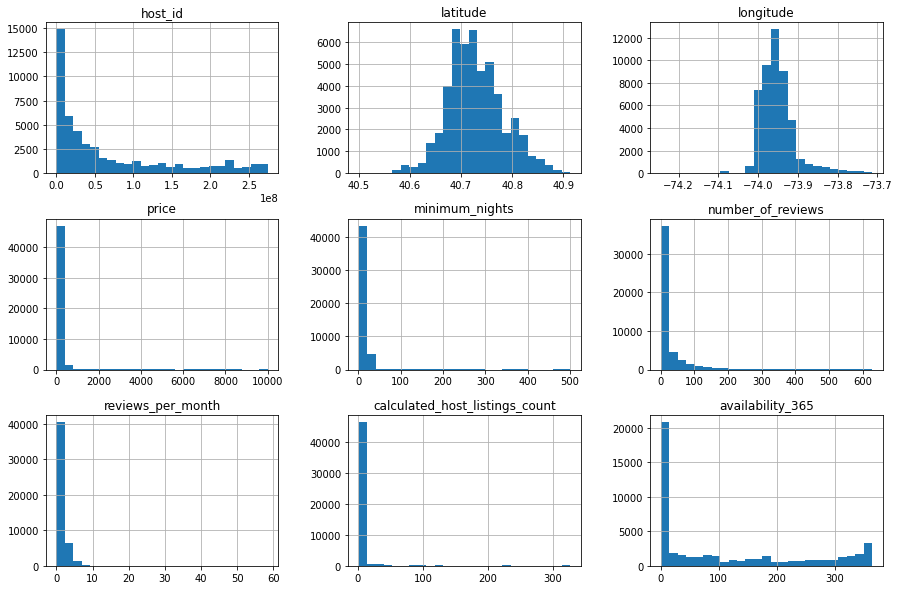

In [7]:
df.hist(bins=25, figsize=(15, 10))
plt.show()

In [8]:
total = df.shape[0]
outliers = df[df.price > 800].shape[0]
(total - outliers) / total

0.9914092861525874

In [9]:
(df.shape[0] - df[df.minimum_nights > 40].shape[0]) / df.shape[0]

0.9897729597054612

In [10]:
(df.shape[0] - df[df.number_of_reviews > 200].shape[0]) / df.shape[0]

0.9870116588259358

In [11]:
(df.shape[0] - df[df.reviews_per_month > 10].shape[0]) / df.shape[0]

0.9983432194722848

In [12]:
(df.shape[0] - df[df.calculated_host_listings_count > 100].shape[0]) / df.shape[0]

0.9839844548987523

In [13]:
df_copy = df.copy()
df.drop(df[df.price > 800].index, inplace=True)
df.drop(df[df.minimum_nights > 40].index, inplace=True)
df.drop(df[df.number_of_reviews > 200].index, inplace=True)
df.drop(df[df.reviews_per_month > 10].index, inplace=True)
df.drop(df[df.calculated_host_listings_count > 100].index, inplace=True)
df.shape

(46538, 12)

In [14]:
(df_copy.shape[0] - df.shape[0]) / df_copy.shape[0] #5 percent

0.04810799754551033

In [15]:
df.describe(exclude=['Int64', 'Float64'])

,neighbourhood_group,neighbourhood,room_type
count,46538,46538,46538
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,20137,3808,23791


In [16]:
df["price_cat"] = pd.qcut(df.price, q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['Low', 'Below_Average', "Above_Average", "High", "Very_High"])

In [17]:
pd.qcut(df.price, q=[0, 0.25, 0.5, 0.75, 0.95, 1])

id
2539        (102.5, 175.0]
2595        (175.0, 345.0]
3647        (102.5, 175.0]
5022         (69.0, 102.5]
5099        (175.0, 345.0]
                 ...      
36484665     (69.0, 102.5]
36485057    (-0.001, 69.0]
36485431    (102.5, 175.0]
36485609    (-0.001, 69.0]
36487245     (69.0, 102.5]
Name: price, Length: 46538, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 69.0] < (69.0, 102.5] < (102.5, 175.0] < (175.0, 345.0] < (345.0, 800.0]]

In [18]:
df["min_nights_cat"] = pd.qcut(df.minimum_nights, q=[0, 0.5, 0.88, 1], labels=["Low", "Medium", "High"])

In [19]:
pd.qcut(df.minimum_nights, q=[0, 0.5, 0.88, 1])

id
2539        (0.999, 2.0]
2595        (0.999, 2.0]
3647         (2.0, 10.0]
5022         (2.0, 10.0]
5099         (2.0, 10.0]
                ...     
36484665    (0.999, 2.0]
36485057     (2.0, 10.0]
36485431     (2.0, 10.0]
36485609    (0.999, 2.0]
36487245     (2.0, 10.0]
Name: minimum_nights, Length: 46538, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 10.0] < (10.0, 40.0]]

In [20]:
df["reviews_cat"] = pd.qcut(df.number_of_reviews, q=[0, 0.5, 0.7, 0.9, 1], labels=["Low", "Below_Average", "Above_Average", "High"])

In [21]:
pd.qcut(df.number_of_reviews, q=[0, 0.5, 0.7, 0.9, 1])

id
2539          (5.0, 17.0]
2595         (17.0, 66.0]
3647        (-0.001, 5.0]
5022          (5.0, 17.0]
5099        (66.0, 200.0]
                ...      
36484665    (-0.001, 5.0]
36485057    (-0.001, 5.0]
36485431    (-0.001, 5.0]
36485609    (-0.001, 5.0]
36487245    (-0.001, 5.0]
Name: number_of_reviews, Length: 46538, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 5.0] < (5.0, 17.0] < (17.0, 66.0] < (66.0, 200.0]]

In [22]:
df_num = df.drop(['neighbourhood', 'neighbourhood_group', 'room_type'], axis=1)

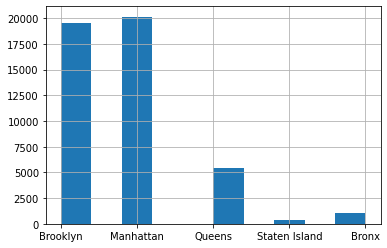

In [23]:
df.neighbourhood_group.hist()
plt.show()

<AxesSubplot:>

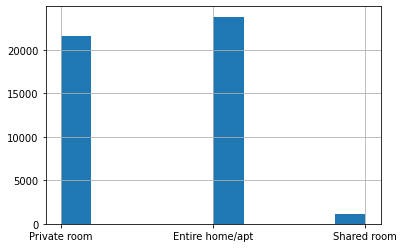

In [24]:
df.room_type.hist()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

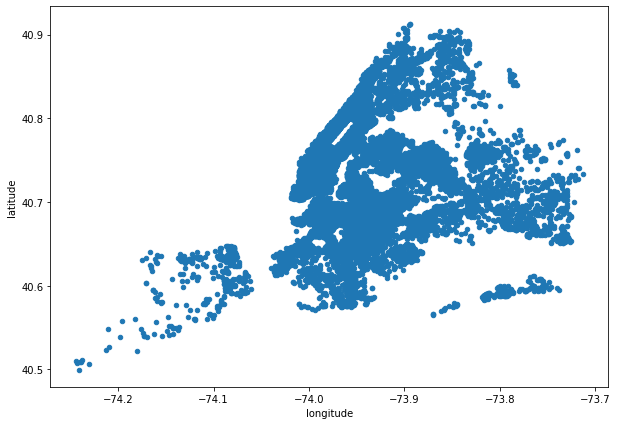

In [25]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7))

No handles with labels found to put in legend.


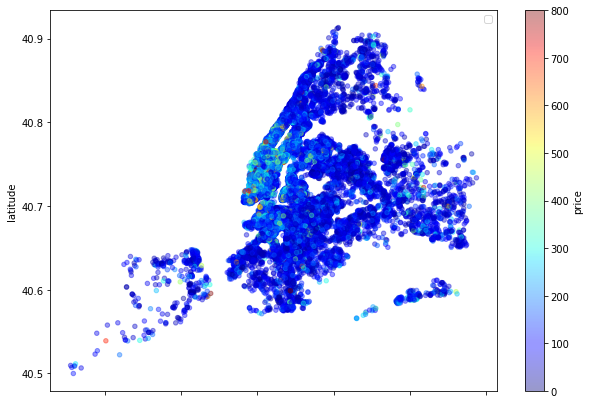

In [26]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7), alpha=0.4, c="price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

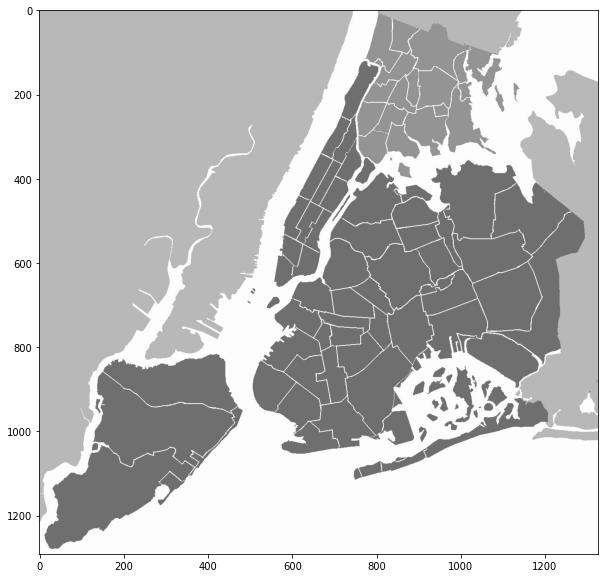

In [27]:
import cv2
ny_image = cv2.imread('New_York_City.png')
plt.figure(figsize=(15, 10))
plt.imshow(ny_image)
plt.show()

In [28]:
min_lat = df.latitude.min()
max_lat = df.latitude.max()
min_long = df.longitude.min()
max_long = df.longitude.max()

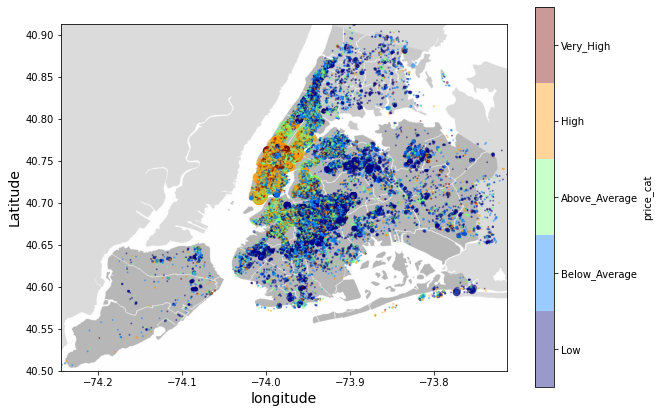

In [29]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10, 7), alpha=0.4, c="price_cat",
                    cmap=plt.get_cmap("jet"), colorbar=True, sharex=False, s=df.calculated_host_listings_count.astype('float'))
plt.imshow(ny_image, extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)
plt.show()

In [30]:
dict_neighbourhood_group = {}
for n_gp in df.neighbourhood_group.unique():
    longi = df[df.neighbourhood_group == n_gp].longitude.mean()
    lati = df[df.neighbourhood_group == n_gp].latitude.mean()
    radius = (df[df.neighbourhood_group == n_gp].latitude.std() + df[df.neighbourhood_group == n_gp].longitude.std()) / 2
    dict_neighbourhood_group[n_gp] = [longi, lati, radius]
dict_neighbourhood_group

{'Brooklyn': [-73.95109823721882, 40.685014276584866, 0.026472194545841713],
 'Manhattan': [-73.97375146794458, 40.766276868947706, 0.030254847631760645],
 'Queens': [-73.87286364560237, 40.73144690872136, 0.04878502252073372],
 'Staten Island': [-74.10578643835616,
  40.60994273972603,
  0.034251447480120864],
 'Bronx': [-73.88440057330827, 40.84827163533834, 0.029663765813093747]}

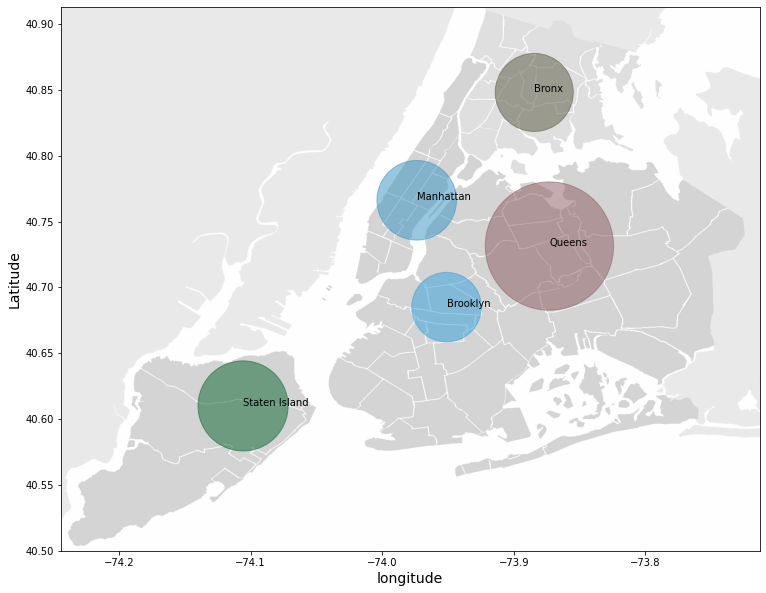

In [31]:
import random
plt.figure(figsize=(15, 10))
for n_gp, values in dict_neighbourhood_group.items():
    plt.text(values[0], values[1], s=str(n_gp))
    cricle = plt.Circle((values[0], values[1]), values[2], alpha=0.5, color=(random.random(), random.random(), random.random()))
    plt.gca().add_patch(cricle)
plt.imshow(ny_image, extent=[min_long, max_long, min_lat, max_lat], alpha=0.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)
plt.show()

In [32]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.097216
calculated_host_listings_count    0.068518
latitude                          0.067183
minimum_nights                    0.026887
host_id                           0.018372
number_of_reviews                -0.043320
reviews_per_month                -0.044930
longitude                        -0.259380
Name: price, dtype: float64

<AxesSubplot:>

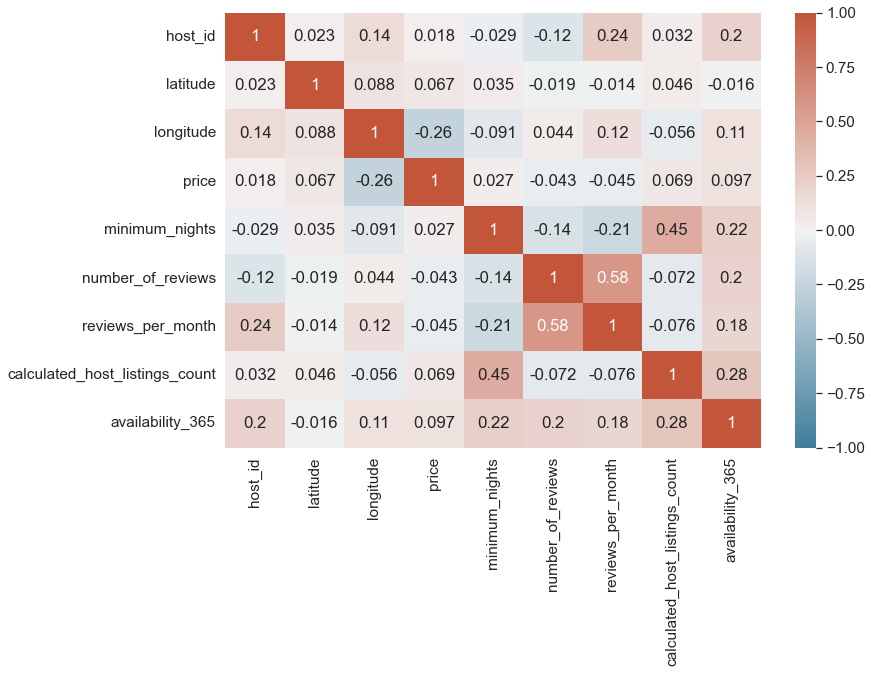

In [33]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmin=-1, vmax=1)

# Room Type Vs. Neighbourhood Group

after applying chi2 test it comes out that these two categorical varaibles are dependent

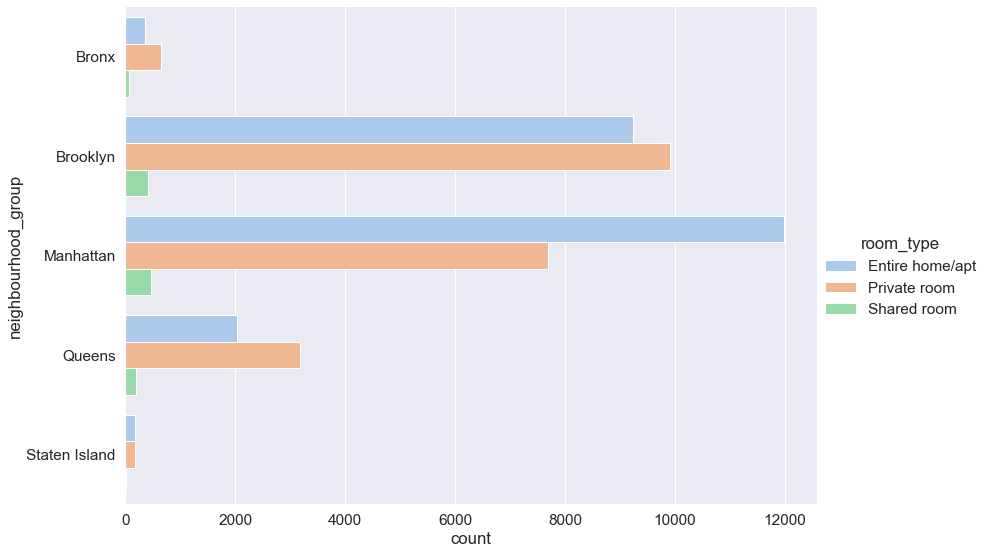

In [34]:
sns.catplot(data=df, y="neighbourhood_group", hue="room_type", kind='count', palette="pastel", height=8, aspect=12/8)

In [35]:
room_neighbour_crosstab = pd.crosstab(df['neighbourhood_group'], df['room_type'])
room_neighbour_crosstab

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,364,641,59
Brooklyn,9239,9910,411
Manhattan,11982,7690,465
Queens,2035,3187,190
Staten Island,171,185,9


In [36]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(room_neighbour_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
1263.053268584142 2.2727727505311226e-267


# Minimum Nights Vs. Room Type

<AxesSubplot:>

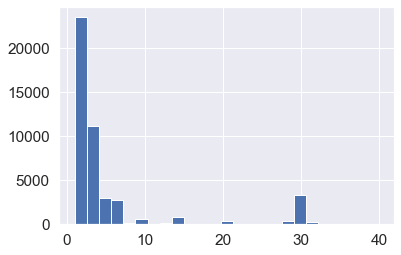

In [37]:
df.minimum_nights.hist(bins=25)

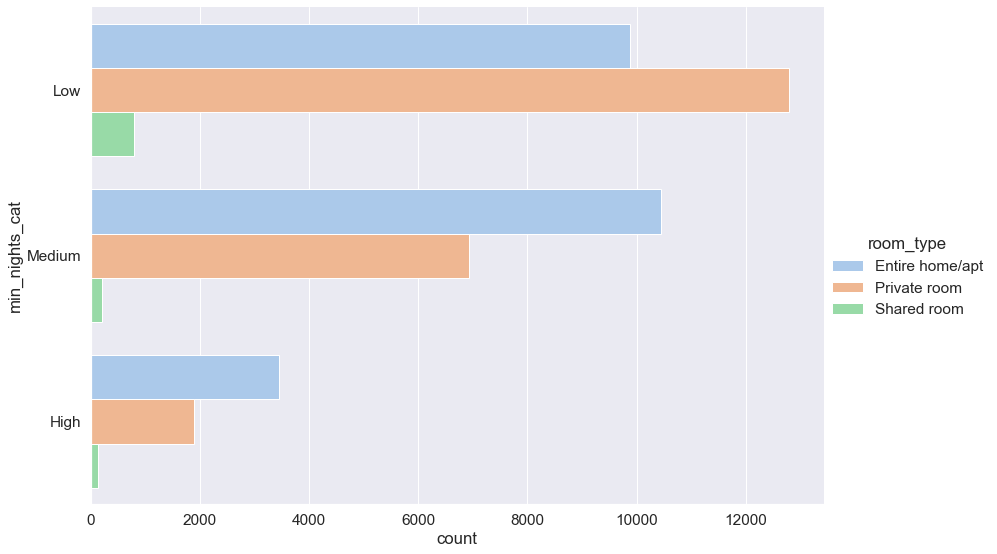

In [38]:
sns.catplot(data=df, y="min_nights_cat", hue="room_type", kind='count', palette="pastel", height=8, aspect=12/8)

In [39]:
room_night_crosstab = pd.crosstab(df['min_nights_cat'], df['room_type'])
room_night_crosstab

room_type,Entire home/apt,Private room,Shared room
min_nights_cat,,,
Low,9886,12786,787
Medium,10447,6932,208
High,3458,1895,139


In [40]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(room_night_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
1635.1918841617805 0.0


# Minimum Nights Vs. Neighbourhood Group

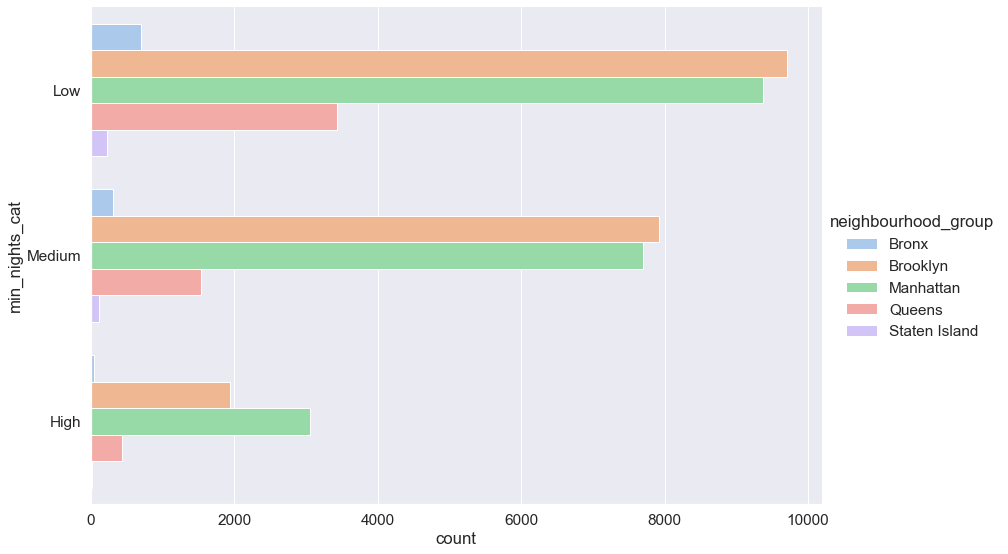

In [41]:
sns.catplot(data=df, y="min_nights_cat", hue="neighbourhood_group", kind='count', palette="pastel", height=8, aspect=12/8)

In [42]:
night_neighbour_crosstab = pd.crosstab(df['min_nights_cat'], df['neighbourhood_group'])
night_neighbour_crosstab

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
min_nights_cat,,,,,
Low,708,9707,9376,3440,228
Medium,308,7917,7705,1540,117
High,48,1936,3056,432,20


In [43]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(night_neighbour_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
882.7934656000965 2.904863731820499e-185


# Reviews Vs. Neighbourhood Group

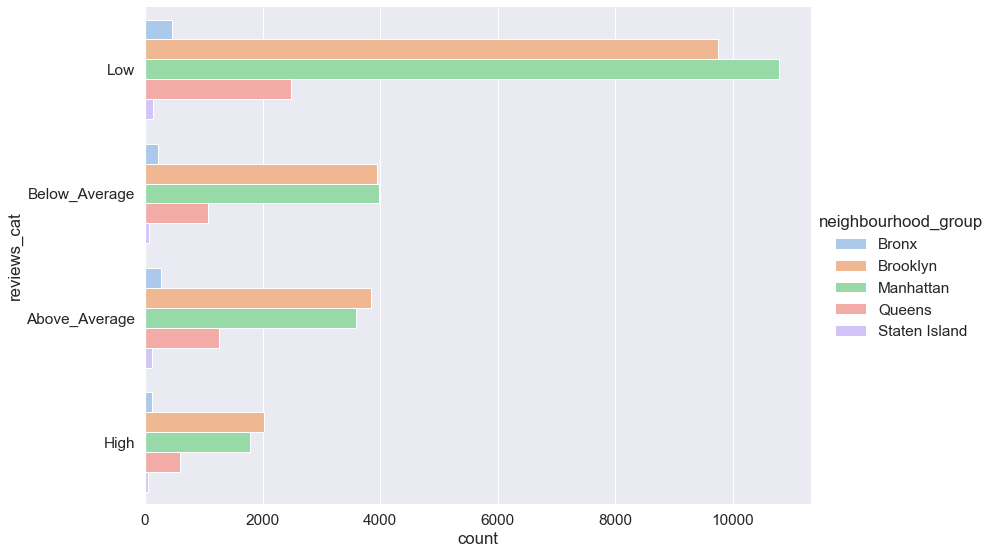

In [44]:
sns.catplot(data=df, y="reviews_cat", hue="neighbourhood_group", kind='count', palette="pastel", height=8, aspect=12/8)

In [45]:
review_neighbour_crosstab = pd.crosstab(df['reviews_cat'], df['neighbourhood_group'])
review_neighbour_crosstab

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
reviews_cat,,,,,
Low,454,9743,10785,2479,131
Below_Average,213,3945,3980,1080,70
Above_Average,277,3846,3587,1259,113
High,120,2026,1785,594,51


In [46]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(review_neighbour_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
248.5647049993294 2.7252695734302306e-46


# Price Vs. Reviews

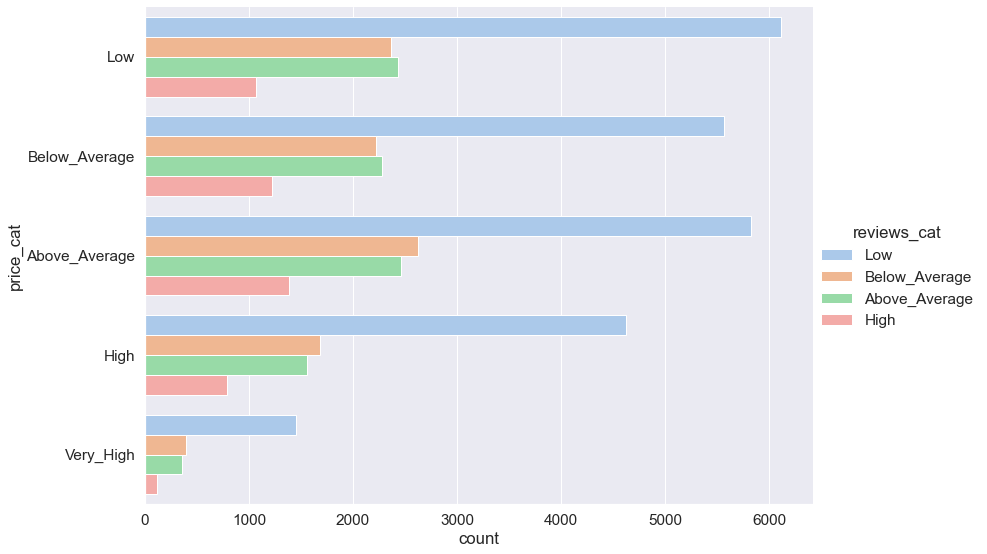

In [47]:
sns.catplot(data=df, y="price_cat", hue="reviews_cat", kind='count', palette="pastel", height=8, aspect=12/8)

In [48]:
price_review_crosstab = pd.crosstab(df['reviews_cat'], df['price_cat'])
price_review_crosstab

price_cat,Low,Below_Average,Above_Average,High,Very_High
reviews_cat,,,,,
Low,6118,5572,5825,4628,1449
Below_Average,2365,2220,2627,1680,396
Above_Average,2429,2279,2464,1555,355
High,1067,1219,1387,784,119


In [49]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(price_review_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
276.01445583147216 5.017138645384156e-52


# Price Vs. Minimum Nights

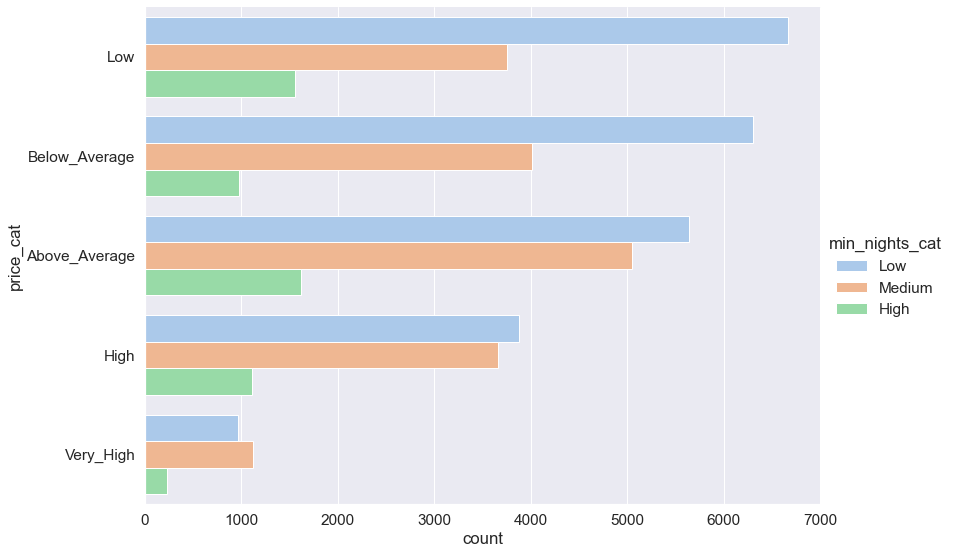

In [50]:
sns.catplot(data=df, y="price_cat", hue="min_nights_cat", kind='count', palette="pastel", height=8, aspect=12/8)

In [51]:
price_nights_crosstab = pd.crosstab(df['min_nights_cat'], df['price_cat'])
price_nights_crosstab

price_cat,Low,Below_Average,Above_Average,High,Very_High
min_nights_cat,,,,,
Low,6669,6302,5638,3882,968
Medium,3754,4010,5049,3656,1118
High,1556,978,1616,1109,233


In [52]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(price_nights_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
704.7327587268887 6.851106482996115e-147


# Price Vs. Room Type

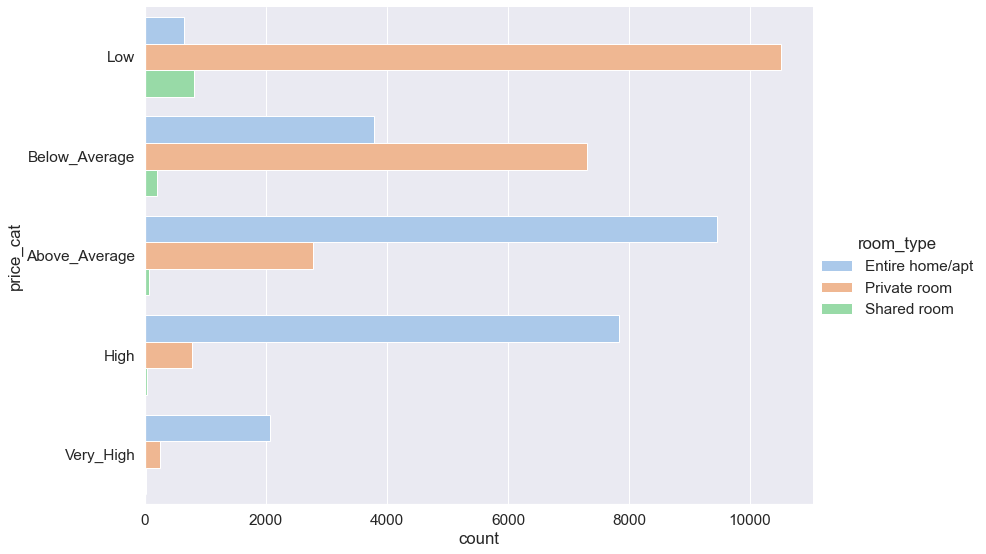

In [53]:
sns.catplot(data=df, y="price_cat", hue="room_type", kind='count', palette="pastel", height=8, aspect=12/8)

In [54]:
price_room_crosstab = pd.crosstab(df['room_type'], df['price_cat'])
price_room_crosstab

price_cat,Low,Below_Average,Above_Average,High,Very_High
room_type,,,,,
Entire home/apt,649,3790,9452,7840,2060
Private room,10518,7300,2782,771,242
Shared room,812,200,69,36,17


In [55]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(price_room_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
21745.912304566322 0.0


# Price x Neighbourhood

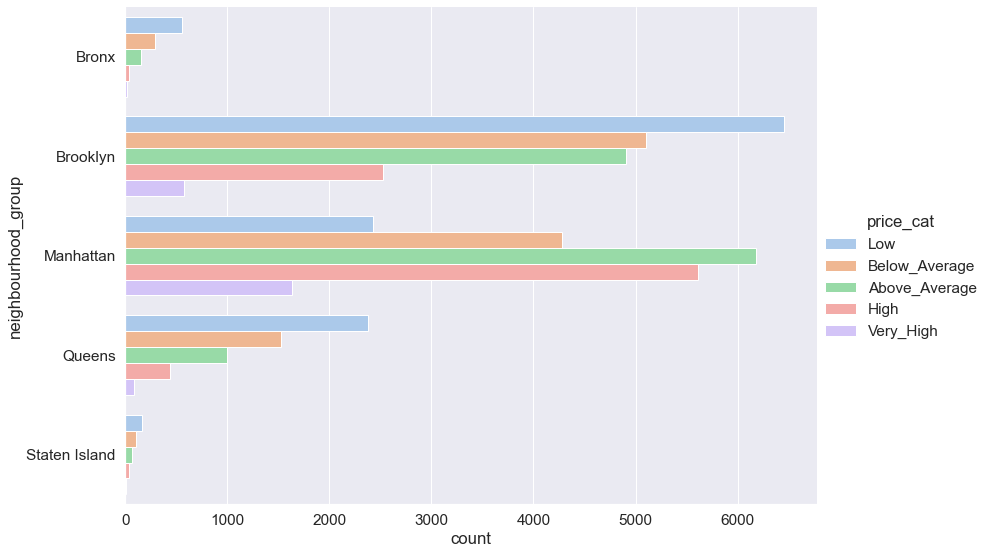

In [56]:
sns.catplot(data=df, y="neighbourhood_group", hue="price_cat", kind='count', palette="pastel", height=8, aspect=12/8)

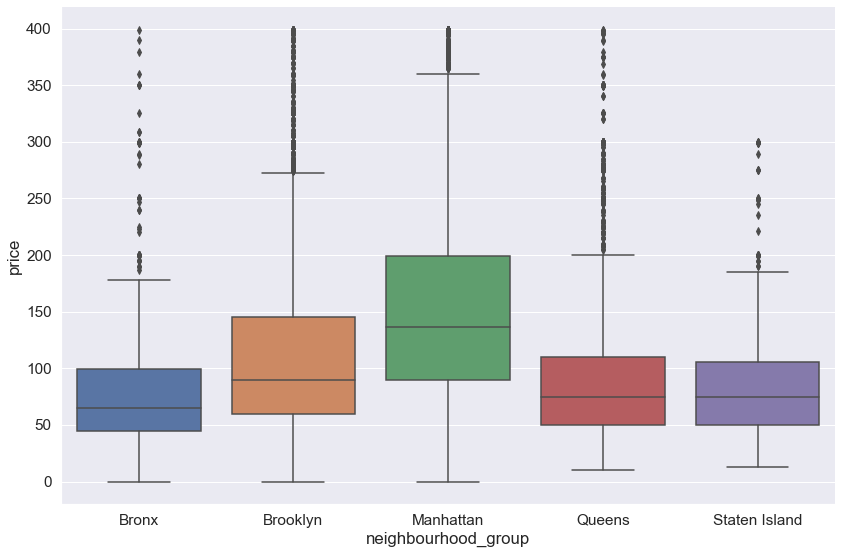

In [57]:
sns.catplot(data=df[df.price < 400], x="neighbourhood_group", y="price", kind='box', height=8, aspect=12/8)

In [58]:
price_neighbour_crosstab = pd.crosstab(df['neighbourhood_group'], df['price_cat'])
price_neighbour_crosstab

price_cat,Low,Below_Average,Above_Average,High,Very_High
neighbourhood_group,,,,,
Bronx,559,287,158,41,19
Brooklyn,6454,5098,4906,2522,580
Manhattan,2429,4278,6185,5611,1634
Queens,2377,1522,993,439,81
Staten Island,160,105,61,34,5


In [59]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(price_neighbour_crosstab)
if p <= 0.05:
    print("dependent (reject H0)")
else:
    print("independent (fail to reject H0)")
print(stat, p)

dependent (reject H0)
5851.423987795459 0.0


In [60]:
from scipy.stats import kruskal
stat, p = kruskal(df[df.neighbourhood_group == "Staten Island"].price,
                  df[df.neighbourhood_group == "Bronx"].price,
                  df[df.neighbourhood_group == "Manhattan"].price,
                  df[df.neighbourhood_group == "Queens"].price,
                  df[df.neighbourhood_group == "Brooklyn"].price)
print(stat, p)

if p > 0.05:
    print("Same distribiution (fail to reject H0")
else:
    print("Diffrent distribiution (reject H0)")

6173.845264388405 0.0
Diffrent distribiution (reject H0)


# Price X Availability

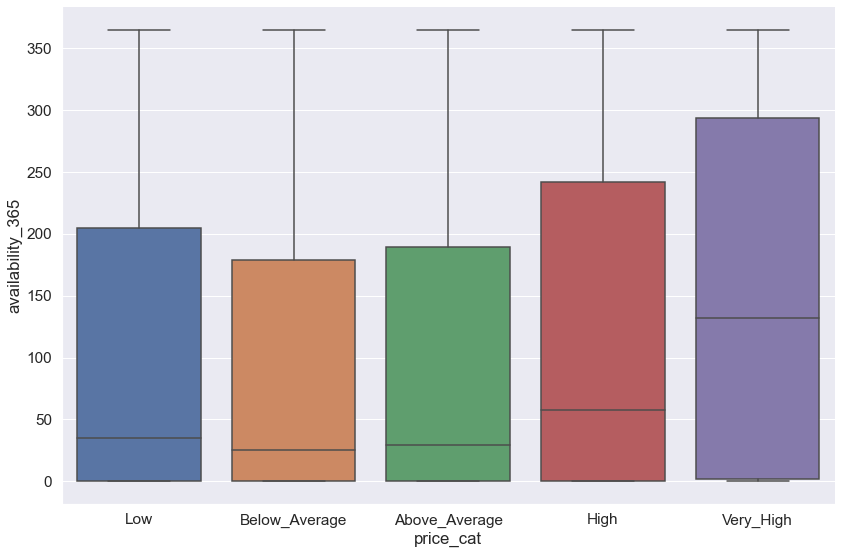

In [61]:
sns.catplot(data=df, x="price_cat", y="availability_365", kind='box', height=8, aspect=12/8)

<AxesSubplot:>

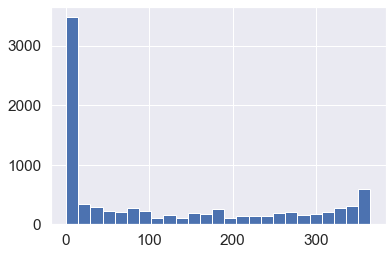

In [62]:
df[df.price_cat == "High"].availability_365.hist(bins=25)

In [63]:
from scipy.stats import kruskal
stat, p = kruskal(df[df.price_cat == "Low"].availability_365,
                  df[df.price_cat == "Below_Average"].availability_365,
                  df[df.price_cat == "Above_Average"].availability_365,
                  df[df.price_cat == "High"].availability_365,
                  df[df.price_cat == "Very_High"].availability_365)
print(stat, p)

if p > 0.05:
    print("Same distribiution (fail to reject H0")
else:
    print("Diffrent distribiution (reject H0)")

464.05412769255634 3.97496109564552e-99
Diffrent distribiution (reject H0)


# Availability Vs. Room

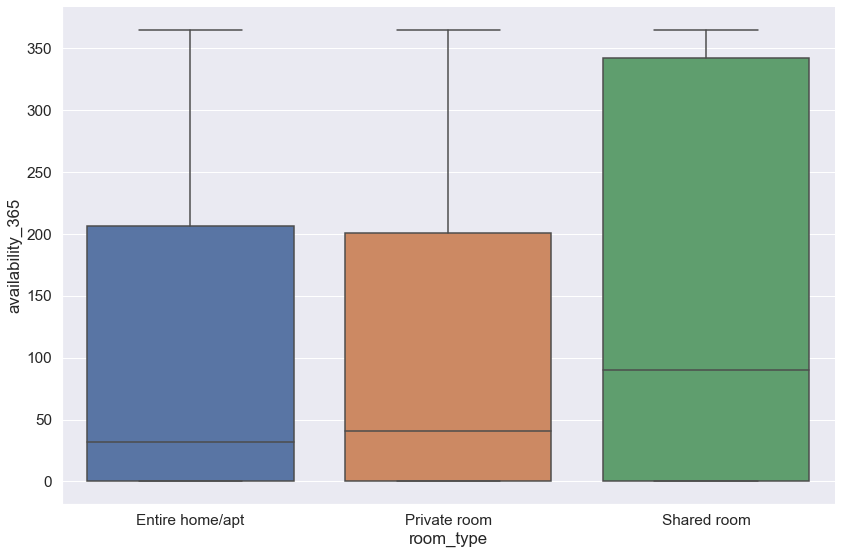

In [64]:
sns.catplot(data=df, x="room_type", y="availability_365", kind='box', height=8, aspect=12/8)

<AxesSubplot:>

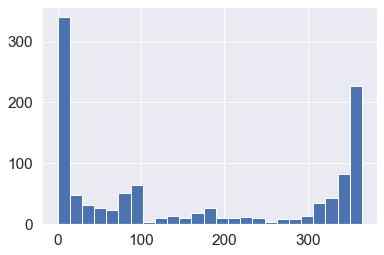

In [65]:
df[df.room_type == "Shared room"].availability_365.hist(bins=25)

In [66]:
from scipy.stats import kruskal
stat, p = kruskal(df[df.room_type == "Private room"].availability_365,
                  df[df.room_type == "Shared room"].availability_365,
                  df[df.room_type == "Entire home/apt"].availability_365)
print(stat, p)

if p > 0.05:
    print("Same distribiution (fail to reject H0")
else:
    print("Diffrent distribiution (reject H0)")

185.55656699675515 5.092176357768498e-41
Diffrent distribiution (reject H0)


# Availability Vs. Neighbourhood Group

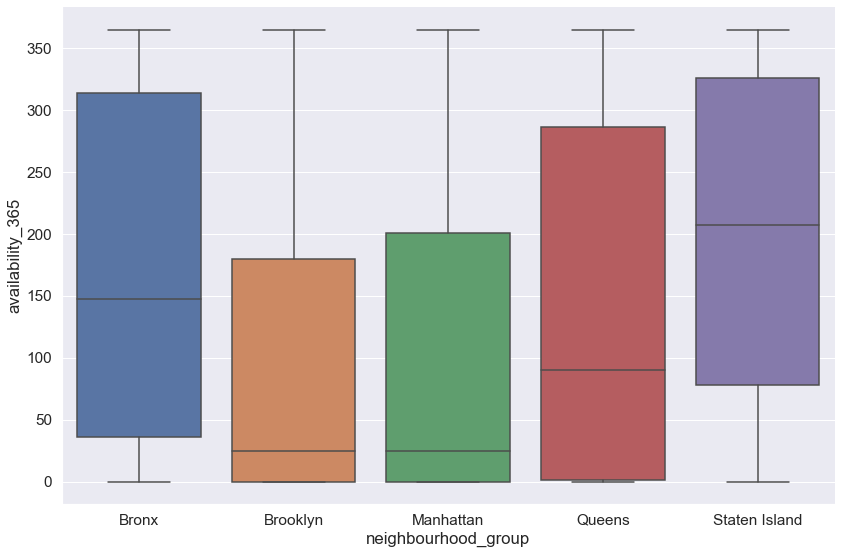

In [67]:
sns.catplot(data=df, x="neighbourhood_group", y="availability_365", kind='box', height=8, aspect=12/8)

<AxesSubplot:>

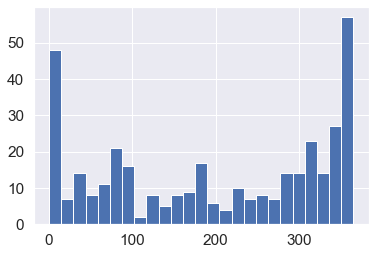

In [68]:
df[df.neighbourhood_group == "Staten Island"].availability_365.hist(bins=25)

In [69]:
from scipy.stats import kruskal
stat, p = kruskal(df[df.neighbourhood_group == "Staten Island"].availability_365,
                  df[df.neighbourhood_group == "Bronx"].availability_365,
                  df[df.neighbourhood_group == "Manhattan"].availability_365,
                  df[df.neighbourhood_group == "Queens"].availability_365,
                  df[df.neighbourhood_group == "Brooklyn"].availability_365)
print(stat, p)

if p > 0.05:
    print("Same distribiution (fail to reject H0")
else:
    print("Diffrent distribiution (reject H0)")

1056.632965761296 1.9001251421325442e-227
Diffrent distribiution (reject H0)


# Hosts Analysis

In [70]:
top_hosts_df_copy = df_copy.host_id.value_counts(ascending=False).head(10)
#top_hosts_df_copy.to_csv("top_hosts.csv")

In [71]:
top_hosts_df = df.host_id.value_counts(ascending=False).head(10)
#top_hosts_df.to_csv("top_hosts.csv")

In [72]:
df.loc[df.host_id.isin(top_hosts_df.index), ["neighbourhood_group"]].value_counts()

neighbourhood_group
Manhattan              627
Brooklyn                53
Bronx                    0
Queens                   0
Staten Island            0
dtype: int64

In [73]:
df.loc[df.host_id.isin(top_hosts_df.index), ["neighbourhood"]].value_counts()

neighbourhood     
Midtown               116
Hell's Kitchen         99
Murray Hill            96
Financial District     66
Upper East Side        64
Greenpoint             52
Upper West Side        46
Chelsea                44
Kips Bay               35
Theater District       15
Gramercy               12
East Village           10
West Village            8
Greenwich Village       5
Tribeca                 4
Little Italy            4
Nolita                  1
SoHo                    1
Civic Center            1
Downtown Brooklyn       1
dtype: int64

In [74]:
df.loc[df.host_id.isin(top_hosts_df.index), ["room_type"]].value_counts()

room_type      
Entire home/apt    633
Private room        47
Shared room          0
dtype: int64

In [75]:
df.loc[df.host_id.isin(top_hosts_df.index), ["reviews_cat"]].value_counts()

reviews_cat  
Low              586
Below_Average     93
Above_Average      1
High               0
dtype: int64

In [76]:
df.loc[df.host_id.isin(top_hosts_df.index), ["price_cat"]].value_counts()

price_cat    
High             304
Above_Average    276
Below_Average     43
Very_High         33
Low               24
dtype: int64

In [77]:
df.loc[df.host_id.isin(top_hosts_df.index), ["min_nights_cat"]].value_counts()

min_nights_cat
High              640
Medium             38
Low                 2
dtype: int64

# Neighbourhood Analysis

In [78]:
top_neighbours = df.neighbourhood.value_counts(ascending=False).head(10)
#top_neighbours.to_csv("nb_top.csv")

In [79]:
df.loc[df.neighbourhood.isin(top_neighbours.index), ["price_cat"]].value_counts()
#plot

price_cat    
Above_Average    6128
Low              5469
Below_Average    5408
High             4317
Very_High        1208
dtype: int64

In [80]:
df.loc[df.neighbourhood.isin(top_neighbours.index), ["room_type"]].value_counts()

room_type      
Entire home/apt    11358
Private room       10685
Shared room          487
dtype: int64

In [81]:
df.loc[df.neighbourhood.isin(top_neighbours.index), ["reviews_cat"]].value_counts()

reviews_cat  
Low              11654
Below_Average     4512
Above_Average     4180
High              2184
dtype: int64

In [82]:
df.loc[df.neighbourhood.isin(top_neighbours.index), ["min_nights_cat"]].value_counts()

min_nights_cat
Low               10842
Medium             8791
High               2897
dtype: int64

In [83]:
df.loc[df.neighbourhood.isin(top_neighbours.index), ["neighbourhood_group"]].value_counts()

neighbourhood_group
Brooklyn               11349
Manhattan              11181
Bronx                      0
Queens                     0
Staten Island              0
dtype: int64